In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [4]:
# Convert categorical data to numeric and separate target feature for training data
# Convert categorical data to numeric and separate target feature for testing data

# drop loan status column
drop_train = train_df.drop('loan_status', axis  = 1)
drop_test = test_df.drop('loan_status', axis  = 1)
target_feature_train = train_df['loan_status']
target_feature_test = test_df['loan_status']

# create one-hot encoding of data frames
train_dum = pd.get_dummies(drop_train)
test_dum = pd.get_dummies(drop_test)

train_labels = LabelEncoder().fit_transform(target_feature_train)
test_labels = LabelEncoder().fit_transform(target_feature_test)

# check number of columns and add missing one to test data

for col in train_dum.columns:
    if col not in test_dum:
        missing_col = col

test_dum[missing_col] = train_dum[missing_col]
#test_dum[missing_col] = [0 for x in range(test_dum.shape[0])]

In [ ]:
# Prediction







In [17]:
# Train the Logistic Regression model on the unscaled data and print the model score
X_train, X_test, y_train, y_test = train_test_split(train_dum, train_labels, random_state=1)

Cs = [1.0,3.0,5.0,7.0,9.0]
maxs = [100,750,1000,10000,15000]
params = [[Cs[i],maxs[i]] for i in range(len(maxs))]

i = 1
trains = []
tests = []
for c in Cs:
    for mx in maxs:
        LR = LogisticRegression(C=c, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=mx,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False)
        LR.fit(train_dum,train_labels)
        print("_______________________")
        print("iteration " + str(i))
        print(f"training score : {LR.score(train_dum,train_labels)}")
        print(f"testing score : {LR.score(test_dum,test_labels)}|reguralization: {c} , max iterations{mx}")
        trains.append(LR.score(train_dum,train_labels))
        tests.append(LR.score(test_dum,test_labels))
        i = i+1

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration1
training score : 0.648440065681445
testing score : 0.5253083794130158|reguralization: 1.0 , max iterations100


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration2
training score : 0.6856321839080459
testing score : 0.5655040408336878|reguralization: 1.0 , max iterations750


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration3
training score : 0.6811986863711001
testing score : 0.5542322415993194|reguralization: 1.0 , max iterations1000


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration4
training score : 0.702216748768473
testing score : 0.5642279880901744|reguralization: 1.0 , max iterations10000
_______________________
iteration5
training score : 0.7016420361247947
testing score : 0.5621012335176521|reguralization: 1.0 , max iterations15000


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration6
training score : 0.648440065681445
testing score : 0.5248830284985113|reguralization: 3.0 , max iterations100


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration7
training score : 0.6852216748768473
testing score : 0.5623139089749043|reguralization: 3.0 , max iterations750


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration8
training score : 0.6785714285714286
testing score : 0.5535942152275627|reguralization: 3.0 , max iterations1000
_______________________
iteration9
training score : 0.6989326765188835
testing score : 0.56571671629094|reguralization: 3.0 , max iterations10000
_______________________
iteration10
training score : 0.6989326765188835
testing score : 0.56571671629094|reguralization: 3.0 , max iterations15000


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration11
training score : 0.6483579638752053
testing score : 0.5248830284985113|reguralization: 5.0 , max iterations100


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration12
training score : 0.6827586206896552
testing score : 0.5563589961718418|reguralization: 5.0 , max iterations750


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration13
training score : 0.6807060755336617
testing score : 0.5544449170565716|reguralization: 5.0 , max iterations1000


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration14
training score : 0.7000821018062398
testing score : 0.5676307954062101|reguralization: 5.0 , max iterations10000


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration15
training score : 0.7044334975369458
testing score : 0.5716716290940026|reguralization: 5.0 , max iterations15000


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration16
training score : 0.6483579638752053
testing score : 0.5248830284985113|reguralization: 7.0 , max iterations100


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration17
training score : 0.6885878489326765
testing score : 0.5716716290940026|reguralization: 7.0 , max iterations750


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration18
training score : 0.7027914614121511
testing score : 0.5825180774138664|reguralization: 7.0 , max iterations1000


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration19
training score : 0.7002463054187192
testing score : 0.5669927690344534|reguralization: 7.0 , max iterations10000
_______________________
iteration20
training score : 0.7006568144499179
testing score : 0.5661420672054445|reguralization: 7.0 , max iterations15000


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration21
training score : 0.6483579638752053
testing score : 0.5248830284985113|reguralization: 9.0 , max iterations100


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration22
training score : 0.6795566502463054
testing score : 0.5542322415993194|reguralization: 9.0 , max iterations750


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration23
training score : 0.6786535303776683
testing score : 0.5523181624840493|reguralization: 9.0 , max iterations1000
_______________________
iteration24
training score : 0.6999178981937603
testing score : 0.5712462781794981|reguralization: 9.0 , max iterations10000
_______________________
iteration25
training score : 0.6999178981937603
testing score : 0.5712462781794981|reguralization: 9.0 , max iterations15000


0.7044334975369458
0.5825180774138664


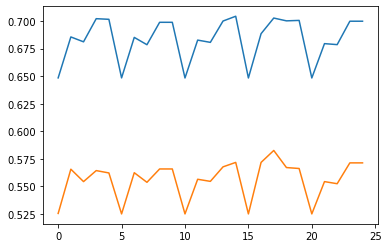

In [18]:
x_vals = [x for x in range(len(trains))]
plt.plot(x_vals,trains)
plt.plot(x_vals,tests)
print(max(trains)) # at iteration 14
print(max(tests))  # at iteration 17, C = 7 and max iterations = 1000

In [19]:
# Train a Random Forest Classifier model and print the model score
num_est = [x for x in range(1,20)]
criteria = ["gini","entropy"]

j = 1
trains_rf = []
tests_rf = []
for n in num_est:
    for c in criteria:
        RF = RandomForestClassifier(n_estimators = n, criterion = c,bootstrap='false')
        RF.fit(train_dum,train_labels)

        print("-------------------")
        print(f"iteration number: {j}")
        print(f"training score : {RF.score(train_dum,train_labels)}")
        print(f"testing score : {RF.score(test_dum,test_labels)}")
        print(f"number of estimators: {n}, criteria: {c} ")
        trains_rf.append(RF.score(train_dum,train_labels))
        tests_rf.append(RF.score(test_dum,test_labels))
        j = j+1 

-------------------
iteration number: 1
training score : 0.8794745484400657
testing score : 0.5652913653764355
number of estimators: 1, criteria: gini 
-------------------
iteration number: 2
training score : 0.8827586206896552
testing score : 0.4746916205869843
number of estimators: 1, criteria: entropy 
-------------------
iteration number: 3
training score : 0.8697044334975369
testing score : 0.6635474266269672
number of estimators: 2, criteria: gini 
-------------------
iteration number: 4
training score : 0.8815270935960591
testing score : 0.5457252233092301
number of estimators: 2, criteria: entropy 
-------------------
iteration number: 5
training score : 0.9486863711001642
testing score : 0.5144619310931519
number of estimators: 3, criteria: gini 
-------------------
iteration number: 6
training score : 0.9486863711001642
testing score : 0.5695448745214802
number of estimators: 3, criteria: entropy 
-------------------
iteration number: 7
training score : 0.9485221674876847
tes

0.9985221674876847
0.6665248830284985


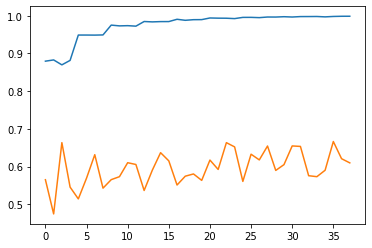

In [21]:
x_vals = [x for x in range(len(trains_rf))]
plt.plot(x_vals,trains_rf)
plt.plot(x_vals,tests_rf)
print(max(trains_rf)) # at iteration 14
print(max(tests_rf))  # at iteration 36, n = 18 and criteria = gini

In [7]:
# Scale the data
scale_train = StandardScaler().fit(train_dum)
X_train_scaled = scale_train.transform(train_dum)
X_test_scaled = scale_train.transform(test_dum)


In [33]:
from sklearn.model_selection import GridSearchCV
# Train the Logistic Regression model on the scaled data and print the model score
Cs = [x for x in range(1,101,2)]
maxs = [float(x+250) for x in range(0,25000,500)]

i = 1
trains = []
tests = []
for c in Cs:
    for mx in maxs:
        LR = LogisticRegression(C=c, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=mx,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False)
        LR.fit(X_train_scaled,train_labels)
        print("_______________________")
        print("iteration" + str(i))
        print(f"training score : {LR.score(X_train_scaled,train_labels)}")
        print(f"testing score : {LR.score(X_test_scaled,test_labels)}")
        print(f"reguralization: {c} , max iterations {mx}")
        trains.append(LR.score(X_train_scaled,train_labels))
        tests.append(LR.score(X_test_scaled,test_labels))
        i = i+1

_______________________
iteration1
training score : 0.7127257799671592
testing score : 0.7201190982560612
reguralization: 1 , max iterations 250.0
_______________________
iteration2
training score : 0.7127257799671592
testing score : 0.7201190982560612
reguralization: 1 , max iterations 750.0
_______________________
iteration3
training score : 0.7127257799671592
testing score : 0.7201190982560612
reguralization: 1 , max iterations 1250.0
_______________________
iteration4
training score : 0.7127257799671592
testing score : 0.7201190982560612
reguralization: 1 , max iterations 1750.0
_______________________
iteration5
training score : 0.7127257799671592
testing score : 0.7201190982560612
reguralization: 1 , max iterations 2250.0
_______________________
iteration6
training score : 0.7127257799671592
testing score : 0.7201190982560612
reguralization: 1 , max iterations 2750.0
_______________________
iteration7
training score : 0.7127257799671592
testing score : 0.7201190982560612
regurali

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration51
training score : 0.7138752052545156
testing score : 0.7167162909400255
reguralization: 3 , max iterations 250.0
_______________________
iteration52
training score : 0.7138752052545156
testing score : 0.7141641854529988
reguralization: 3 , max iterations 750.0
_______________________
iteration53
training score : 0.7138752052545156
testing score : 0.7141641854529988
reguralization: 3 , max iterations 1250.0
_______________________
iteration54
training score : 0.7138752052545156
testing score : 0.7141641854529988
reguralization: 3 , max iterations 1750.0
_______________________
iteration55
training score : 0.7138752052545156
testing score : 0.7141641854529988
reguralization: 3 , max iterations 2250.0
_______________________
iteration56
training score : 0.7138752052545156
testing score : 0.7141641854529988
reguralization: 3 , max iterations 2750.0
_______________________
iteration57
training score : 0.7138752052545156
testing score : 0.7141641854529988
r

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration101
training score : 0.7138752052545156
testing score : 0.714376860910251
reguralization: 5 , max iterations 250.0
_______________________
iteration102
training score : 0.7140394088669951
testing score : 0.7135261590812421
reguralization: 5 , max iterations 750.0
_______________________
iteration103
training score : 0.7140394088669951
testing score : 0.7135261590812421
reguralization: 5 , max iterations 1250.0
_______________________
iteration104
training score : 0.7140394088669951
testing score : 0.7135261590812421
reguralization: 5 , max iterations 1750.0
_______________________
iteration105
training score : 0.7140394088669951
testing score : 0.7135261590812421
reguralization: 5 , max iterations 2250.0
_______________________
iteration106
training score : 0.7140394088669951
testing score : 0.7135261590812421
reguralization: 5 , max iterations 2750.0
_______________________
iteration107
training score : 0.7140394088669951
testing score : 0.713526159081

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration151
training score : 0.7137931034482758
testing score : 0.7137388345384943
reguralization: 7 , max iterations 250.0
_______________________
iteration152
training score : 0.7136288998357964
testing score : 0.7105487026797107
reguralization: 7 , max iterations 750.0
_______________________
iteration153
training score : 0.7136288998357964
testing score : 0.7105487026797107
reguralization: 7 , max iterations 1250.0
_______________________
iteration154
training score : 0.7136288998357964
testing score : 0.7105487026797107
reguralization: 7 , max iterations 1750.0
_______________________
iteration155
training score : 0.7136288998357964
testing score : 0.7105487026797107
reguralization: 7 , max iterations 2250.0
_______________________
iteration156
training score : 0.7136288998357964
testing score : 0.7105487026797107
reguralization: 7 , max iterations 2750.0
_______________________
iteration157
training score : 0.7136288998357964
testing score : 0.71054870267

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration201
training score : 0.7137110016420362
testing score : 0.7137388345384943
reguralization: 9 , max iterations 250.0
_______________________
iteration202
training score : 0.7136288998357964
testing score : 0.6926839642705231
reguralization: 9 , max iterations 750.0
_______________________
iteration203
training score : 0.7136288998357964
testing score : 0.6926839642705231
reguralization: 9 , max iterations 1250.0
_______________________
iteration204
training score : 0.7136288998357964
testing score : 0.6926839642705231
reguralization: 9 , max iterations 1750.0
_______________________
iteration205
training score : 0.7136288998357964
testing score : 0.6926839642705231
reguralization: 9 , max iterations 2250.0
_______________________
iteration206
training score : 0.7136288998357964
testing score : 0.6926839642705231
reguralization: 9 , max iterations 2750.0
_______________________
iteration207
training score : 0.7136288998357964
testing score : 0.69268396427

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration251
training score : 0.7137931034482758
testing score : 0.7133134836239898
reguralization: 11 , max iterations 250.0
_______________________
iteration252
training score : 0.7134646962233169
testing score : 0.688855806039983
reguralization: 11 , max iterations 750.0
_______________________
iteration253
training score : 0.7134646962233169
testing score : 0.688855806039983
reguralization: 11 , max iterations 1250.0
_______________________
iteration254
training score : 0.7134646962233169
testing score : 0.688855806039983
reguralization: 11 , max iterations 1750.0
_______________________
iteration255
training score : 0.7134646962233169
testing score : 0.688855806039983
reguralization: 11 , max iterations 2250.0
_______________________
iteration256
training score : 0.7134646962233169
testing score : 0.688855806039983
reguralization: 11 , max iterations 2750.0
_______________________
iteration257
training score : 0.7134646962233169
testing score : 0.6888558060

0.7140394088669951
0.7239472564866014


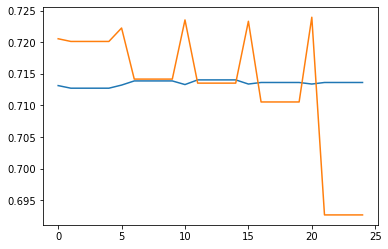

In [29]:
x_vals = [x for x in range(len(trains))]
plt.plot(x_vals,trains)
plt.plot(x_vals,tests)
print(max(trains)) # at iteration 14
print(max(tests))  # at iteration 17, C = 7 and max iterations = 1000

In [9]:
from sklearn.model_selection import GridSearchCV
Cs = [x for x in range(1,101,2)]
maxs = [float(x+250) for x in range(0,25000,500)]
p_grid = {'C':Cs,"max_iter":maxs}
model = LogisticRegression()
grid_clf = GridSearchCV(model, p_grid, verbose=3)
grid_clf.fit(X_train_scaled,train_labels)


Fitting 5 folds for each of 2500 candidates, totalling 12500 fits
[CV] C=1, max_iter=250.0 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. C=1, max_iter=250.0, score=0.486, total=   0.6s
[CV] C=1, max_iter=250.0 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ................. C=1, max_iter=250.0, score=0.590, total=   0.5s
[CV] C=1, max_iter=250.0 .............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] ................. C=1, max_iter=250.0, score=0.727, total=   0.5s
[CV] C=1, max_iter=250.0 .............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................. C=1, max_iter=250.0, score=0.737, total=   0.5s
[CV] C=1, max_iter=250.0 .............................................
[CV] ................. C=1, max_iter=250.0, score=0.710, total=   0.5s
[CV] C=1, max_iter=750.0 .............................................
[CV] ................. C=1, max_iter=750.0, score=0.486, total=   0.4s
[CV] C=1, max_iter=750.0 .............................................
[CV] ................. C=1, max_iter=750.0, score=0.590, total=   0.5s
[CV] C=1, max_iter=750.0 .............................................
[CV] ................. C=1, max_iter=750.0, score=0.727, total=   0.4s
[CV] C=1, max_iter=750.0 .............................................
[CV] ................. C=1, max_iter=750.0, score=0.737, total=   0.5s
[CV] C=1, max_iter=750.0 .............................................
[CV] ................. C=1, max_iter=750.0, score=0.710, total=   0.4s
[CV] C=1, max_iter=1250.0 ............................................
[CV] .

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................. C=3, max_iter=250.0, score=0.486, total=   0.5s
[CV] C=3, max_iter=250.0 .............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................. C=3, max_iter=250.0, score=0.589, total=   0.5s
[CV] C=3, max_iter=250.0 .............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................. C=3, max_iter=250.0, score=0.727, total=   0.5s
[CV] C=3, max_iter=250.0 .............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................. C=3, max_iter=250.0, score=0.738, total=   0.5s
[CV] C=3, max_iter=250.0 .............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................. C=3, max_iter=250.0, score=0.711, total=   0.5s
[CV] C=3, max_iter=750.0 .............................................
[CV] ................. C=3, max_iter=750.0, score=0.486, total=   0.6s
[CV] C=3, max_iter=750.0 .............................................
[CV] ................. C=3, max_iter=750.0, score=0.589, total=   0.5s
[CV] C=3, max_iter=750.0 .............................................
[CV] ................. C=3, max_iter=750.0, score=0.728, total=   0.5s
[CV] C=3, max_iter=750.0 .............................................
[CV] ................. C=3, max_iter=750.0, score=0.739, total=   0.6s
[CV] C=3, max_iter=750.0 .............................................
[CV] ................. C=3, max_iter=750.0, score=0.711, total=   0.6s
[CV] C=3, max_iter=1250.0 ............................................
[CV] ................ C=3, max_iter=1250.0, score=0.486, total=   0.6s
[CV] C=3, max_iter=1250.0 ............................................
[CV] .

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................. C=5, max_iter=250.0, score=0.486, total=   0.5s
[CV] C=5, max_iter=250.0 .............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................. C=5, max_iter=250.0, score=0.589, total=   0.5s
[CV] C=5, max_iter=250.0 .............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................. C=5, max_iter=250.0, score=0.727, total=   0.5s
[CV] C=5, max_iter=250.0 .............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................. C=5, max_iter=250.0, score=0.738, total=   0.5s
[CV] C=5, max_iter=250.0 .............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................. C=5, max_iter=250.0, score=0.711, total=   0.5s
[CV] C=5, max_iter=750.0 .............................................
[CV] ................. C=5, max_iter=750.0, score=0.486, total=   0.6s
[CV] C=5, max_iter=750.0 .............................................
[CV] ................. C=5, max_iter=750.0, score=0.590, total=   0.6s
[CV] C=5, max_iter=750.0 .............................................
[CV] ................. C=5, max_iter=750.0, score=0.727, total=   0.6s
[CV] C=5, max_iter=750.0 .............................................
[CV] ................. C=5, max_iter=750.0, score=0.739, total=   0.7s
[CV] C=5, max_iter=750.0 .............................................
[CV] ................. C=5, max_iter=750.0, score=0.710, total=   0.7s
[CV] C=5, max_iter=1250.0 ............................................
[CV] ................ C=5, max_iter=1250.0, score=0.486, total=   0.6s
[CV] C=5, max_iter=1250.0 ............................................
[CV] .

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................. C=7, max_iter=250.0, score=0.485, total=   0.5s
[CV] C=7, max_iter=250.0 .............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................. C=7, max_iter=250.0, score=0.589, total=   0.5s
[CV] C=7, max_iter=250.0 .............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................. C=7, max_iter=250.0, score=0.727, total=   0.5s
[CV] C=7, max_iter=250.0 .............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................. C=7, max_iter=250.0, score=0.739, total=   0.5s
[CV] C=7, max_iter=250.0 .............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................. C=7, max_iter=250.0, score=0.710, total=   0.5s
[CV] C=7, max_iter=750.0 .............................................
[CV] ................. C=7, max_iter=750.0, score=0.485, total=   0.9s
[CV] C=7, max_iter=750.0 .............................................
[CV] ................. C=7, max_iter=750.0, score=0.589, total=   0.5s
[CV] C=7, max_iter=750.0 .............................................
[CV] ................. C=7, max_iter=750.0, score=0.727, total=   0.5s
[CV] C=7, max_iter=750.0 .............................................
[CV] ................. C=7, max_iter=750.0, score=0.738, total=   0.8s
[CV] C=7, max_iter=750.0 .............................................
[CV] ................. C=7, max_iter=750.0, score=0.711, total=   0.6s
[CV] C=7, max_iter=1250.0 ............................................
[CV] ................ C=7, max_iter=1250.0, score=0.485, total=   0.9s
[CV] C=7, max_iter=1250.0 ............................................
[CV] .

In [27]:
# Train a Random Forest Classifier model on the scaled data and print the model score
num_est = [x for x in range(1,20)]
criteria = ["gini","entropy"]
j = 1
trains_rf = []
tests_rf = []
for n in num_est:
    for c in criteria:
        RF = RandomForestClassifier(n_estimators = n, criterion = c,bootstrap='false')
        RF.fit(X_train_scaled,train_labels)

        print("-------------------")
        print(f"iteration number: {j}")
        print(f"training score : {RF.score(X_train_scaled,train_labels)}")
        print(f"testing score : {RF.score(X_test_scaled,test_labels)}")
        print(f"number of estimators: {n}, criteria: {c} ")
        trains_rf.append(RF.score(X_train_scaled,train_labels))
        tests_rf.append(RF.score(X_test_scaled,test_labels))
        j = j+1 


-------------------
iteration number: 1
training score : 0.864367816091954
testing score : 0.5331773713313483
number of estimators: 1, criteria: gini 
-------------------
iteration number: 2
training score : 0.8809523809523809
testing score : 0.4736282433007231
number of estimators: 1, criteria: entropy 
-------------------
iteration number: 3
training score : 0.8713464696223316
testing score : 0.584006805614632
number of estimators: 2, criteria: gini 
-------------------
iteration number: 4
training score : 0.8744663382594418
testing score : 0.5525308379413015
number of estimators: 2, criteria: entropy 
-------------------
iteration number: 5
training score : 0.94376026272578
testing score : 0.6095278604849
number of estimators: 3, criteria: gini 
-------------------
iteration number: 6
training score : 0.9503284072249589
testing score : 0.6373883453849426
number of estimators: 3, criteria: entropy 
-------------------
iteration number: 7
training score : 0.945648604269294
testing sco

0.9988505747126437
0.6924712888132709


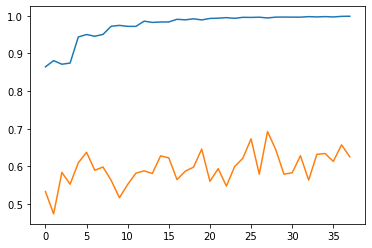

In [28]:
x_vals = [x for x in range(len(trains_rf))]
plt.plot(x_vals,trains_rf)
plt.plot(x_vals,tests_rf)
print(max(trains_rf)) # at iteration 14
print(max(tests_rf))  # at iteration 36, n = 18 and criteria = gini

In [ ]:
# Result Comparision